In [16]:
import warnings
warnings.filterwarnings('ignore')

In [24]:
a = np.array([[1, 3, 4, 2, 2, 7],
              [5, 2, 2, 1, 4, 1],
              [3, 3, 2, 2, 1, 1]])

### simple statistics module

In [31]:
import statistics

l = np.array([1, 3, 4, 2, 2, 7])

statistics.mode(l)

2

### avec scipy.stats.mode()

In [1]:
import numpy as np
from scipy import stats



m = stats.mode(a)
print(m)

ModeResult(mode=array([[1, 3, 2, 2, 1, 1]]), count=array([[1, 2, 2, 2, 1, 2]]))


In [2]:
print(m[0])

[[1 3 2 2 1 1]]


### avec numpy (1ere version)

In [7]:
import numpy as np

def mode(ndarray, axis=0):
    
    # Check inputs
    ndarray = np.asarray(ndarray)
    ndim = ndarray.ndim
    if ndarray.size == 1:
        return (ndarray[0], 1)
    elif ndarray.size == 0:
        raise Exception('Impossible de calculer le mode sur un tableau vide')
    try:
        axis = range(ndarray.ndim)[axis]
    except:
        raise Exception('Axis "{}" incompatible avec array en {}-dimension'.format(axis, ndim))

    # Si array est 1-D et que la version numpy est > 1.9 np.unique suffira
    if all([ndim == 1,
            int(np.__version__.split('.')[0]) >= 1,
            int(np.__version__.split('.')[1]) >= 9]):
        modals, counts = np.unique(ndarray, return_counts=True)
        index = np.argmax(counts)
        return modals[index], counts[index]

    # Sort array
    sort = np.sort(ndarray, axis=axis)
    
    # Créer un array à transposer le long de l'axe et obtenir un padding shape
    transpose = np.roll(np.arange(ndim)[::-1], axis)
    shape = list(sort.shape)
    shape[axis] = 1
    
    # Créer un array booléen le long des strides (memoires des cases de l'array) de valeurs uniques
    strides = np.concatenate([np.zeros(shape=shape, dtype='bool'),
                                 np.diff(sort, axis=axis) == 0,
                                 np.zeros(shape=shape, dtype='bool')],
                                axis=axis).transpose(transpose).ravel()
    
    # Compte la longueur des strides
    counts = np.cumsum(strides)
    counts[~strides] = np.concatenate([[0], np.diff(counts[~strides])])
    counts[strides] = 0
    
    # Obtenez la forme des padded counts et slice pour revenir à la forme d'origine
    shape = np.array(sort.shape)
    shape[axis] += 1
    shape = shape[transpose]
    slices = [slice(None)] * ndim
    slices[axis] = slice(1, None)
    
    # Reshape and compute final counts
    counts = counts.reshape(shape).transpose(transpose)[slices] + 1

    # Trouve maximum counts et retourne modals/counts
    slices = [slice(None, i) for i in sort.shape]
    del slices[axis]
    index = np.ogrid[slices]
    index.insert(axis, np.argmax(counts, axis=axis))
    return sort[index], counts[index]

In [17]:
a = numpy.array([[1, 3, 4, 2, 2, 7],
                 [5, 2, 2, 1, 4, 1],
                 [3, 3, 2, 2, 1, 1]])

mode(a)

(array([1, 3, 2, 2, 1, 1]), array([1, 2, 2, 2, 1, 2], dtype=int32))

#### STRIDES

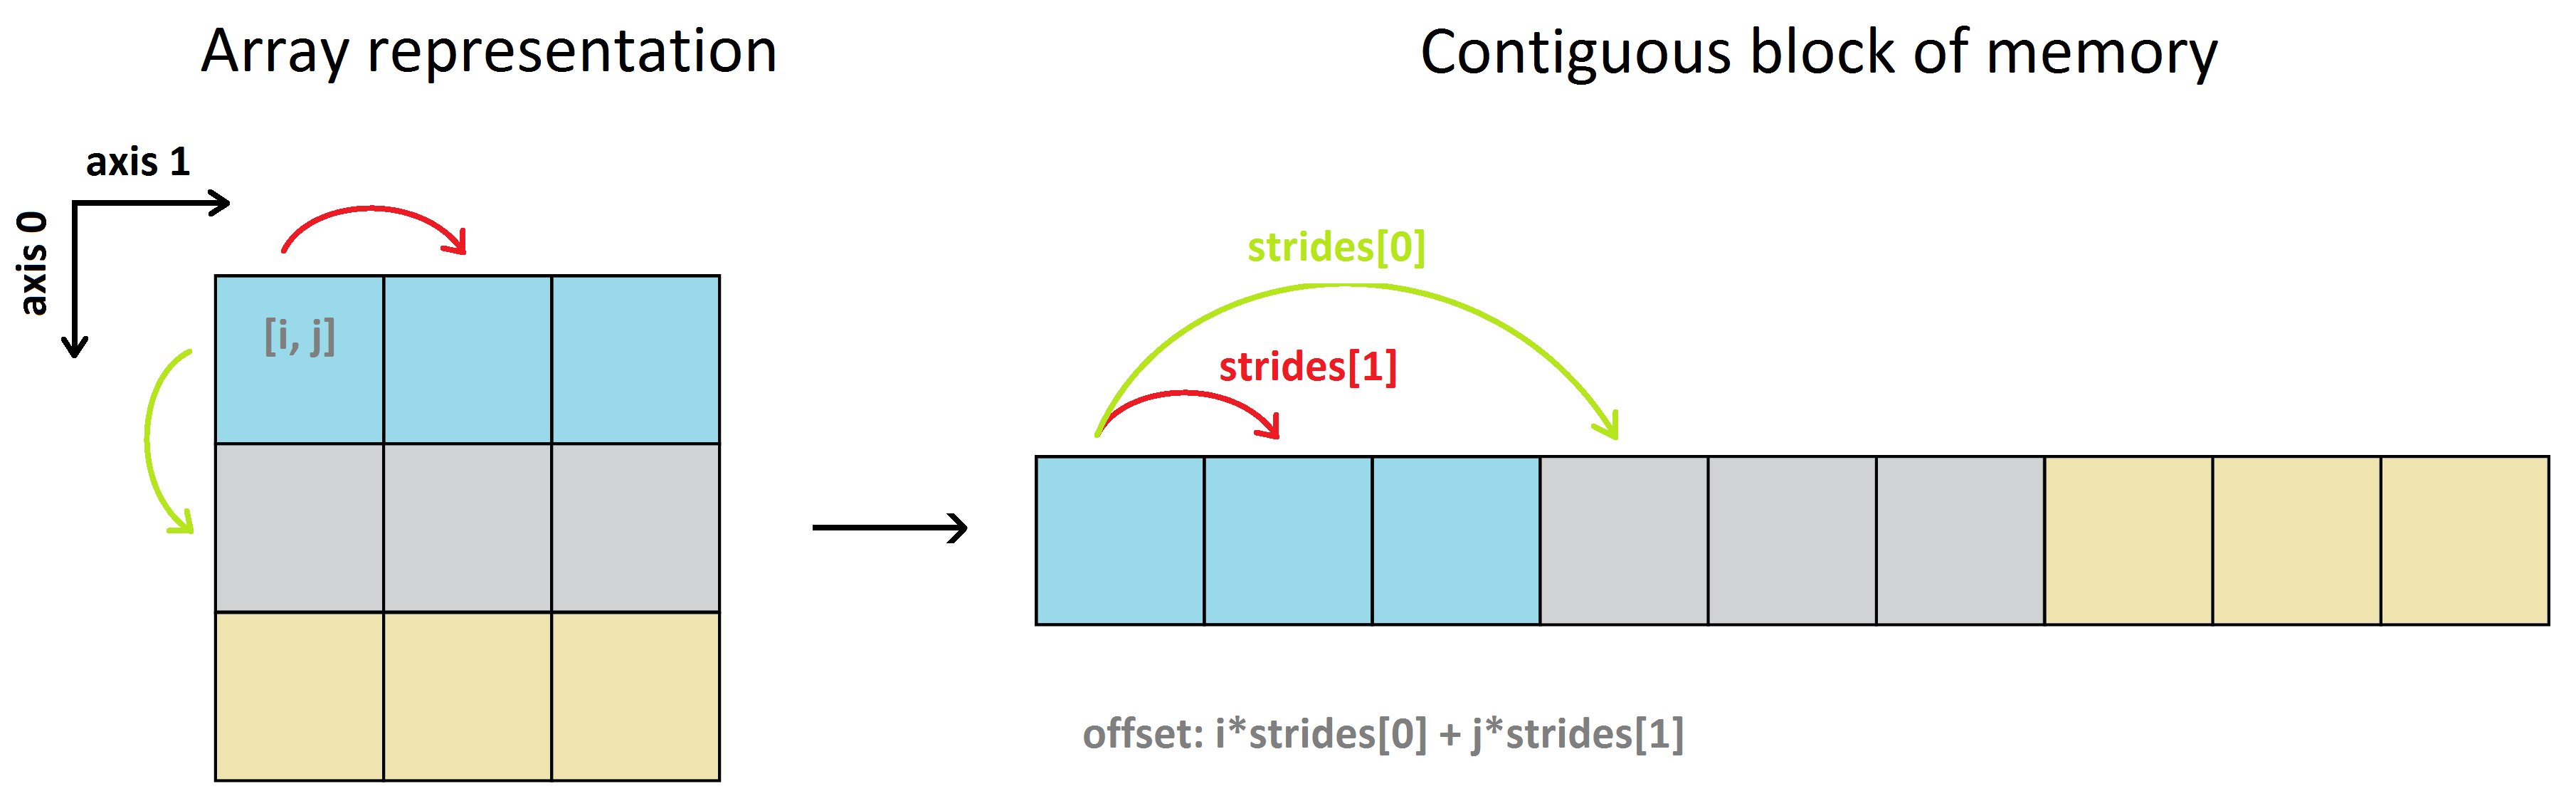

### Some benchmarks:

**PADDED**

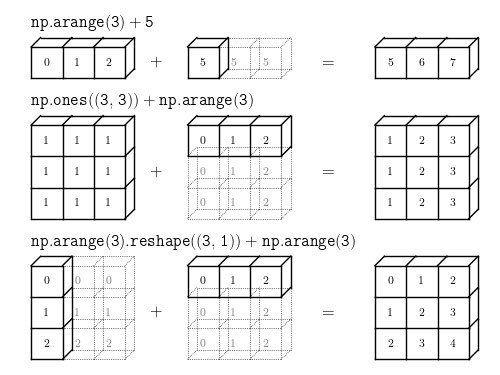

In [8]:
import scipy.stats

a = numpy.random.randint(1,10,(1000,1000))

%timeit scipy.stats.mode(a)

49.6 ms ± 2.99 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [18]:
%timeit mode(a)

96.4 µs ± 2.71 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [10]:
a = numpy.random.randint(1,500,(1000,1000))

In [11]:
%timeit scipy.stats.mode(a)

71.7 ms ± 2.39 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [19]:
%timeit mode(a)

96.8 µs ± 7.52 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [13]:
a = numpy.random.random((200,200))

In [14]:
%timeit scipy.stats.mode(a)

7.16 ms ± 289 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [15]:
%timeit mode(a)

C:\Users\david\AppData\Local\Temp\ipykernel_20128\2995309570.py:49: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  counts = counts.reshape(shape).transpose(transpose)[slices] + 1
C:\Users\david\AppData\Local\Temp\ipykernel_20128\2995309570.py:56: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return sort[index], counts[index]


1.62 ms ± 141 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


### Numpy only

In [21]:
x = [-1, 2, 1, 3, 3]

def mode(x):
    vals,counts = np.unique(x, return_counts=True)
    index = np.argmax(counts)
    return vals[index]

In [22]:
mode(x)

3

### Another numpy only

In [23]:
A = np.array([[1,3,4,2,2,7], [5,2,2,1,4,1], [3,3,2,2,1,1]])

np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=A)

array([1, 3, 2, 2, 1, 1], dtype=int64)

### function for mode

In [32]:
def most_frequent_dict(liste):
    liste = liste.tolist()
    dic = {}
    count, itm = 0, ''
    for item in reversed(liste):
        dic[item] = dic.get(item, 0) + 1
        if dic[item] >= count :
            count, itm = dic[item], item
    return(itm)

def most_frequent(liste):
    count = 0
    num = liste[0]
    
    
    for el in liste:
        curr_frequency = liste.tolist().count(el)
        if curr_frequency > count:
            count = curr_frequency
            num = el
    return num

In [37]:
print(l)

print(most_frequent_dict(l))

print(most_frequent(l))

[1 3 4 2 2 7]
2
2
